In [159]:
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt
# %matplotlib widget 
%matplotlib inline
#need to install ipympl

In [160]:
def movavg(array, window): #window must be odd
    arymov = np.zeros(len(array))
    for i in range(0,len(array)):
        startind = i-(window-1)/2
        if startind < 0:
            startind = 0
        endind = i+(window-1)/2
        if endind > len(array)-1:
            endind = len(array)-1
        arymov[i] = np.sum(array[int(startind):int(endind)+1])/(int(endind)-int(startind)+1)
    return arymov

In [161]:
# test the movavg function
#a = np.arange(1,21,1)
#b = movavg(a,3)
#print(a)
#print(b)

## a. Construct T curve using total RF

In [162]:
datafilename = "RF_by_agents.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date1  = data[:,0]
RF_tot = data[:,1]
RF_sol = data[:,22]
RF_vol = data[:,21]

datafilename = r"C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\forcing_fromGISS\forcing_GISS_CMIP5_Miller_2014.CSV"
print("Read data from file:", datafilename)
data2   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
#date2  = data2[:,0]
RF_sol2 = data2[:,4]
RF_vol2 = data2[:,10]
# 1st Correction approach: by using solar & volcanic forcing from GISS
#RF_tot2 = RF_tot[1850-1765:2013-1765] - RF_sol[1850-1765:2013-1765] - RF_vol[1850-1765:2013-1765] + RF_sol2+RF_vol2
# 2nd Correction approach: by subtraction by an offset of 0.172779 from the positive volcanic forcing
RF_tot2 = RF_tot[1850-1765:2013-1765] - 0.172779
date2 = np.arange(1850,2013,1)
print(RF_tot2.shape)
print(date2.shape)

Read data from file: RF_by_agents.csv
Read data from file: C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\forcing_fromGISS\forcing_GISS_CMIP5_Miller_2014.CSV
(163,)
(163,)


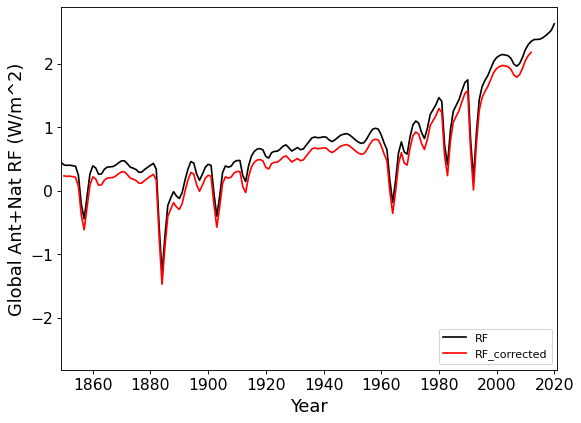

In [163]:
py.figure(1,figsize=(8, 6), dpi=80)
py.plot(date1, RF_tot, color= "black",label="RF")
py.plot(date2, RF_tot2, color="red",label="RF_corrected")
#py.plot(date2, RFar5, color="black",dashes=[3,1])
py.xlim(1849,2021)
py.legend(loc = "lower right")
py.ylabel("Global Ant+Nat RF (W/m^2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

In [164]:
# Used the impulse function by Jim based on CMIP6 4xco2 exp simulations
# IRF polynomial fit params
K0         = -0.4194842 
K1         = 0.9330434
K2         = -0.1868783
K3         = 0.01516102
t          = np.arange(0.5, 140.5, 1.0) # time in years
impulselen = len(t)
t          = np.log(t)
tresponse  = np.exp(K0 + K1*t + K2*t**2 + K3*t**3) #fit to powerpoint curve

# recalculation based on 7 CMIP6 models
K0         = 0.51961371 
K1         = 0.47959172
K2         = -0.05218341
K3         = 0.00225736
tresponse2  = np.exp(K0 + K1*t + K2*t**2 + K3*t**3) #fit to powerpoint curve

RF = 5.35*np.log(1140/285)
print("Radiative forcing: {0:4.2f} W m^-2".format(RF))

deltatresponse = (tresponse[1:]-tresponse[:-1])/RF
deltatresponse = np.insert(deltatresponse, 0, tresponse[0]/RF)
print(len(deltatresponse))
print(deltatresponse[0:4])
print("sum of delta t response:    ", np.sum(deltatresponse)*RF)
print("final state of t response : ", tresponse[-1])

deltatresponse2 = (tresponse2[1:]-tresponse2[:-1])/RF
deltatresponse2 = np.insert(deltatresponse2, 0, tresponse2[0]/RF)
print("-------------recalculation based on CMIP6 models---------------")
print(len(deltatresponse2))
print(deltatresponse2[0:4])
print("sum of delta t response2:    ", np.sum(deltatresponse)*RF)
print("final state of t response2 : ", tresponse[-1])

Radiative forcing: 7.42 W m^-2
140
[0.04222315 0.08338213 0.05462617 0.03895901]
sum of delta t response:     4.291278968989971
final state of t response :  4.291278968989971
-------------recalculation based on CMIP6 models---------------
140
[0.15844176 0.11461162 0.06425839 0.04528963]
sum of delta t response2:     4.291278968989971
final state of t response2 :  4.291278968989971


In [165]:
# --- for CMIP5
nyears      = len(date2)
RFts        = np.zeros(nyears) # RF estimated from CO2 time series
Tasrtf      = np.zeros(nyears) # Tas estimated from radiative forcing and temperature response

Tasrtf[0] = 15.0
for t in range(0,nyears):   # loop over all the different time steps in the model
  RFts[t] = RF_tot2[t]
  Tas     = 0.0
  if t < impulselen:
    for j in range(t):
      Tas = Tas + RFts[t-j]*deltatresponse[j] 
      #print(j, RFts[t-j], deltatresponse[j])
  else:
    for j in range(impulselen):
      Tas = Tas + RFts[t-j]*deltatresponse[j]
      #print(j, RFts[t-j], deltatresponse[j])
  Tasrtf[t] =  Tasrtf[0] + Tas  
  print(t,RFts[t])
  #print(t,Tasrtf[t])

# --- for CMIP6
nyears      = len(date2)
RFts        = np.zeros(nyears) # RF estimated from CO2 time series
Tasrtf2      = np.zeros(nyears) # Tas estimated from radiative forcing and temperature response

Tasrtf2[0] = 15.0
for t in range(0,nyears):   # loop over all the different time steps in the model
  RFts[t] = RF_tot2[t]
  Tas     = 0.0
  if t < impulselen:
    for j in range(t):
      Tas = Tas + RFts[t-j]*deltatresponse2[j] 
      #print(j, RFts[t-j], deltatresponse[j])
  else:
    for j in range(impulselen):
      Tas = Tas + RFts[t-j]*deltatresponse2[j]
      #print(j, RFts[t-j], deltatresponse[j])
  Tasrtf2[t] =  Tasrtf2[0] + Tas  
  print(t,RFts[t])
  #print(t,Tasrtf[t])

0 0.23261715000000002
1 0.22584612
2 0.22774191000000002
3 0.22069629999999998
4 0.21136244
5 0.07004723000000002
6 -0.38385150999999995
7 -0.61726929
8 -0.269615341
9 0.08933004000000003
10 0.21793048
11 0.18501149000000003
12 0.08533540000000003
13 0.09112539
14 0.16345494000000002
15 0.19798505000000002
16 0.20226580000000002
17 0.20676074000000003
18 0.23198602
19 0.26792611
20 0.29708960000000006
21 0.29604012
22 0.24999364
23 0.19700999
24 0.18095574
25 0.15968200000000002
26 0.11553047000000002
27 0.12020253
28 0.16143041
29 0.19546700000000003
30 0.22717596000000004
31 0.25642623
32 0.16704125
33 -0.73631226
34 -1.4745544
35 -0.89171784
36 -0.40858757999999995
37 -0.28999418
38 -0.189377936
39 -0.25728857
40 -0.29626487
41 -0.20094729
42 -0.0013242299999999818
43 0.16758823000000003
44 0.28576771
45 0.26218717
46 0.09013003
47 -0.009612939999999986
48 0.08592033000000002
49 0.19521134000000004
50 0.24197881000000002
51 0.22571117
52 -0.214449226
53 -0.57614813
54 -0.254480345
5

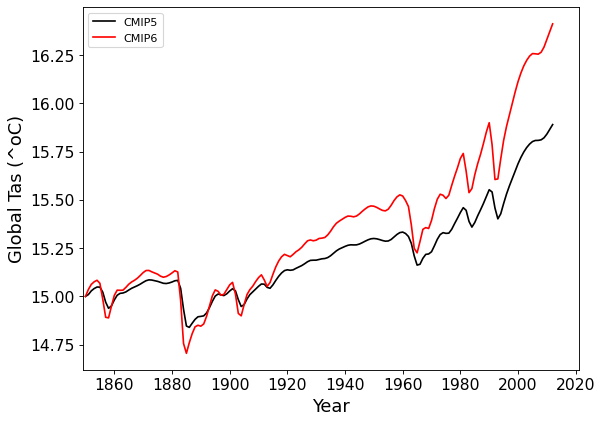

In [166]:
py.figure(1,figsize=(8, 6), dpi=80)
py.plot(date2, Tasrtf, color= "black",label="CMIP5")
py.plot(date2, Tasrtf2, color ="red",label="CMIP6")
py.legend(loc="upper left")
py.xlim(1849,2021)
py.ylabel("Global Tas (^oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

In [167]:
datafilename = "glob_ts_GISSv4.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date22  = data[:,0]
TasGISS = data[:,13]
datafilename = "totalCI_ERA.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
TasGISSun = data[:,2]
#print(date1)
#print(date22)
print(np.average(Tasrtf2[1951-1850:1980-1850]))
offset = np.average(Tasrtf[1951-1850:1980-1850])
offset2 = np.average(Tasrtf2[1951-1850:1980-1850])
TasGISS1 = movavg(TasGISS+offset,5)
TasGISS2 = movavg(TasGISS+offset2,5)
print(TasGISS1)

Read data from file: glob_ts_GISSv4.csv
Read data from file: totalCI_ERA.csv
15.456049094814906
[15.17837914 15.16553192 15.13515692 15.10115692 15.05482358 15.00382358
 15.00265692 15.03765692 15.03382358 15.05099025 15.06799025 15.03965692
 14.99999025 15.02499025 15.04782358 15.08082358 15.08965692 15.11432358
 15.14299025 15.13349025 15.10015692 15.08032358 15.02232358 14.98565692
 14.97182358 14.94899025 14.93649025 14.93299025 14.89882358 14.85615692
 14.86215692 14.87915692 14.94515692 15.00432358 15.02082358 15.00099025
 15.01099025 14.98699025 14.96015692 14.99382358 15.02915692 15.03532358
 15.03649025 15.04732358 15.06399025 15.07682358 15.08999025 15.07132358
 15.08282358 15.08432358 15.09482358 15.07599025 15.12232358 15.11365692
 15.10249025 15.12949025 15.18699025 15.20932358 15.27515692 15.34232358
 15.36082358 15.37899025 15.42265692 15.41515692 15.36315692 15.34432358
 15.30482358 15.24249025 15.18949025 15.19015692 15.19765692 15.23499025
 15.23032358 15.23699025 15.

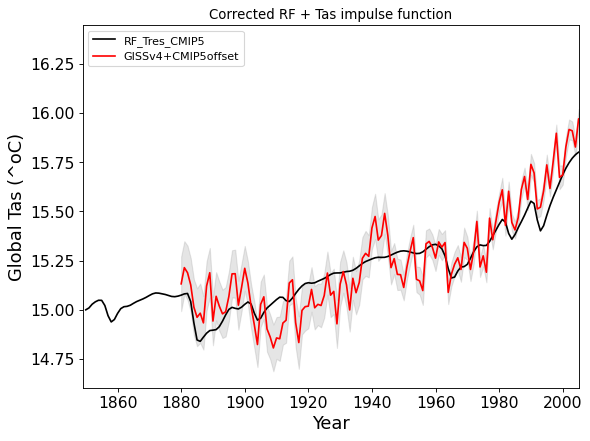

In [168]:
py.figure(1,figsize=(8, 6), dpi=80)
py.plot(date2, Tasrtf, color= "black", label="RF_Tres_CMIP5")
#py.plot(date2, Tasrtf2,color="black",dashes=[3,2],label="RF_Tres_CMIP6")
py.plot(date22, TasGISS+offset, color="red", label="GISSv4+CMIP5offset")
plt.fill_between(date22, TasGISS+offset-TasGISSun, TasGISS+offset+TasGISSun,color='gray',alpha=0.2 )
#py.plot(date22, TasGISS1, color="red",dashes=[3,1], label="GISSv4+CMIP5offset (5yr avg)")
#py.plot(date22, TasGISS+offset2, color="red",dashes=[3,2] ,label="GISSv4+CMIP6offset")
py.legend(loc="upper left")
py.title("Corrected RF + Tas impulse function")
py.xlim(1849,2005)
py.ylabel("Global Tas (^oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

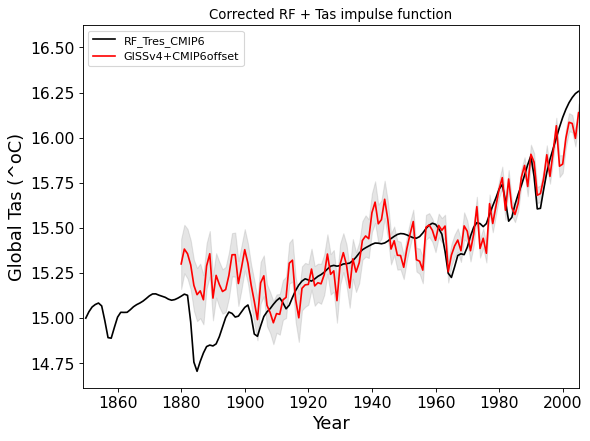

In [169]:
py.figure(1,figsize=(8, 6), dpi=80)
#py.plot(date2, Tasrtf, color= "black", label="RF_Tres_CMIP5")
py.plot(date2, Tasrtf2,color="black",label="RF_Tres_CMIP6")
#py.plot(date22, TasGISS+offset, color="red", label="GISSv4+CMIP5offset")
py.plot(date22, TasGISS+offset2, color="red" ,label="GISSv4+CMIP6offset")
plt.fill_between(date22, TasGISS+offset2-TasGISSun, TasGISS+offset2+TasGISSun,color='gray',alpha=0.2 )
#py.plot(date22, TasGISS2, color="red",dashes=[3,1], label="GISSv4+CMIP5offset (5yr avg)")
py.legend(loc="upper left")
py.title("Corrected RF + Tas impulse function")
py.xlim(1849,2005)
py.ylabel("Global Tas (^oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

### Conceptual Box model for climate warming prediction

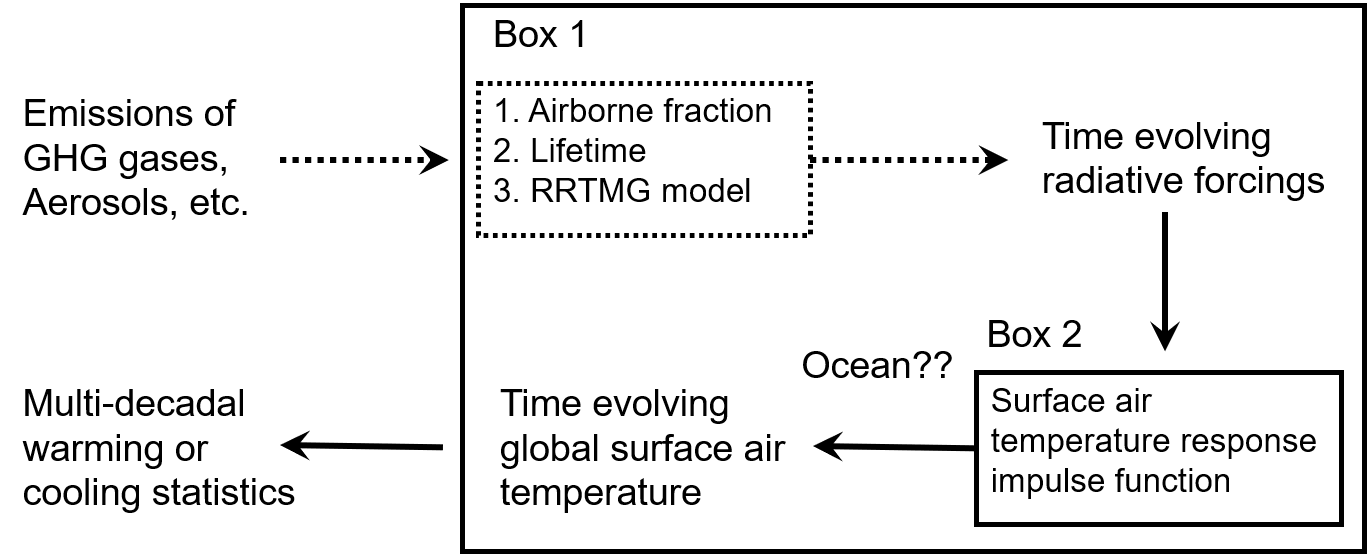

In [2]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "boxmodel.png", width = 600, height = 300)

## b. GHG RF & warming

In [147]:
datafilename = "RF_by_agents.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date1  = data[:,0]
RF_GHG = data[:,2]
RF_CO2 = data[:,3]
RF_CH4 = data[:,4]
RF_N2O = data[:,5]
RF_Flo = data[:,19]
RF_Hal = data[:,20]
RFt = np.stack((RF_GHG,RF_CO2,RF_CH4,RF_N2O,RF_Flo,RF_Hal),axis=-1)
print(RFt.shape)

Read data from file: RF_by_agents.csv
(256, 6)


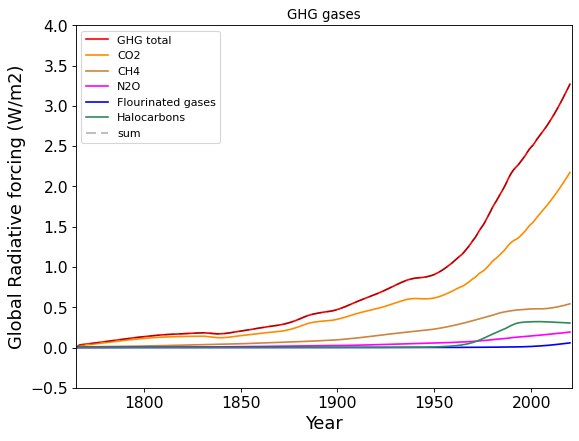

In [148]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["GHG total","CO2","CH4","N2O","Flourinated gases","Halocarbons"]
colorname= ["red","darkorange","peru","magenta","blue","seagreen"]
for nn in range(0,6):
  py.plot(date1, RFt[:,nn], color= colorname[nn], label= labname[nn])
py.plot(date1,np.sum(RFt[:,1:],axis=1),color='black',dashes=[6,3],label='sum',alpha=0.3)
py.legend(loc="upper left")
py.xlim(1765,2021)
py.title("GHG gases")
py.ylim(-0.5,4)
py.ylabel("Global Radiative forcing (W/m2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

## c. Aerosols

In [149]:
datafilename = "RF_by_agents.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date1  = data[:,0]
RF_Aer = data[:,6]
RF_Ocf = data[:,7]
RF_Bcf = data[:,8]
RF_Sul = data[:,9]
RF_Nit = data[:,10]
RF_Bba = data[:,11]
RF_Dst = data[:,12]
RF_Cld = data[:,13]
RF_Bcs = data[:,18]
RFt = np.stack((RF_Aer,RF_Ocf,RF_Bcf,RF_Sul,RF_Nit,RF_Bba,RF_Dst,RF_Cld,RF_Bcs),axis=-1)
print(RFt.shape)

Read data from file: RF_by_agents.csv
(256, 9)


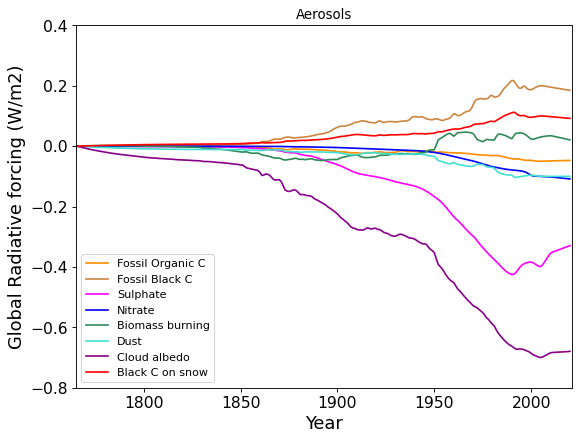

In [150]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["Total aerosol","Fossil Organic C","Fossil Black C","Sulphate","Nitrate","Biomass burning","Dust","Cloud albedo","Black C on snow"]
colorname= ["red","darkorange","peru","magenta","blue","seagreen","turquoise","darkmagenta","red"]
for nn in range(1,9):
  py.plot(date1, RFt[:,nn], color= colorname[nn], label= labname[nn])
py.legend(loc="lower left")
py.xlim(1765,2021)
py.title("Aerosols")
py.ylim(-0.8,0.4)
py.ylabel("Global Radiative forcing (W/m2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

## d. Volcanic & Solar

In [151]:
datafilename = "RF_by_agents.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date1  = data[:,0]
RF_Voc = data[:,21]
RF_Sol = data[:,22]
RFt = np.stack((RF_Voc,RF_Sol),axis=-1)
print(RFt.shape)

Read data from file: RF_by_agents.csv
(256, 2)


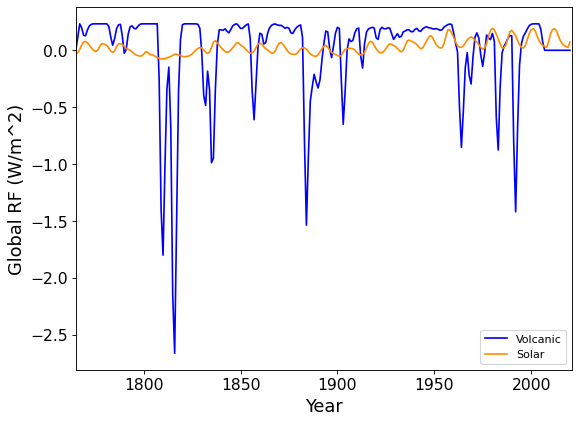

In [152]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["Volcanic","Solar"]
colorname= ["blue","darkorange"]
for nn in range(0,2):
  py.plot(date1, RFt[:,nn], color= colorname[nn], label= labname[nn])
#py.plot(date1,RF_Ocf+RF_Bcf+RF_Sul+RF_Nit+RF_Bba+RF_Dst, color="orange",dashes=[3,1],label="Sum")
py.legend(loc="lower right")
py.xlim(1765,2021)
py.ylabel("Global RF (W/m^2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

In [153]:
datafilename = r"C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\forcing_fromGISS\forcing_GISS_CMIP5_Miller_2014.CSV"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date2  = data[:,0]
RF_Voc = data[:,10]
RF_Sol = data[:,4]
RFt2 = np.stack((RF_Voc,RF_Sol),axis=-1)
print(RFt2.shape)

Read data from file: C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\forcing_fromGISS\forcing_GISS_CMIP5_Miller_2014.CSV
(163, 2)


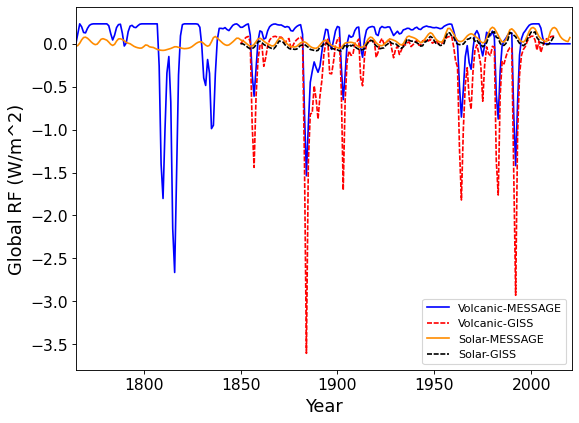

In [154]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["Volcanic-MESSAGE","Solar-MESSAGE"]
labname2= ["Volcanic-GISS","Solar-GISS"]
colorname= ["blue","darkorange"]
colorname2= ["red","black"]
for nn in range(0,2):
  py.plot(date1, RFt[:,nn], color= colorname[nn], label= labname[nn])
  py.plot(date2, RFt2[:,nn], color= colorname2[nn], label= labname2[nn],dashes=[3,1])
#py.plot(date1,RF_Ocf+RF_Bcf+RF_Sul+RF_Nit+RF_Bba+RF_Dst, color="orange",dashes=[3,1],label="Sum")
py.legend(loc="lower right")
py.xlim(1765,2021)
py.ylabel("Global RF (W/m^2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

In [155]:
tmp = RFt[:,0]
condition = tmp > 0
print(condition)
tmp = np.extract(tmp > 0, tmp)
print(tmp)
print(np.average(tmp))

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False  True  True  True  True
 False  True  True  True  True False False False  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

## e. The rest items

In [156]:
datafilename = "RF_by_agents.csv"
print("Read data from file:", datafilename)
data   = np.loadtxt(datafilename, delimiter = ",", skiprows=1)
date1  = data[:,0]
RF_O3s = data[:,14]
RF_O3t = data[:,15]
RF_Coq = data[:,16]
RF_Lsa = data[:,17]
RFt = np.stack((RF_O3s,RF_O3t,RF_Coq,RF_Lsa),axis=-1)
print(RFt.shape)

Read data from file: RF_by_agents.csv
(256, 4)


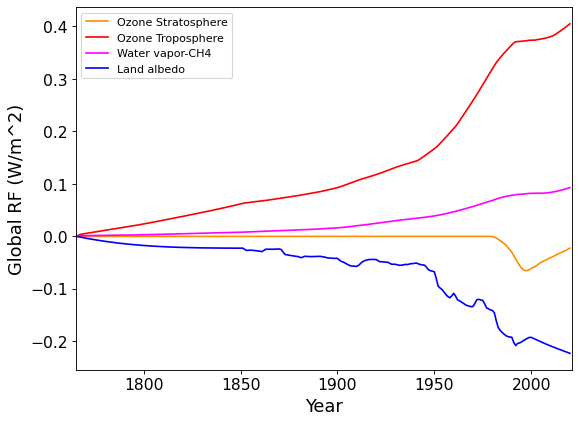

In [157]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["Ozone Stratosphere","Ozone Troposphere","Water vapor-CH4","Land albedo"]
colorname= ["darkorange","red","magenta","blue"]
for nn in range(0,4):
    py.plot(date1, RFt[:,nn], color= colorname[nn], label= labname[nn])
#py.plot(date1,RF_Ocf+RF_Bcf+RF_Sul+RF_Nit+RF_Bba+RF_Dst, color="orange",dashes=[3,1],label="Sum")
py.legend(loc="upper left")
py.xlim(1765,2021)
py.ylabel("Global RF (W/m^2)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()